In [1]:
#Importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#loading the train data and test data
train=pd.read_csv("Dataset/20percent_labelled.csv")
test=pd.read_csv("Dataset/Test.csv")

In [3]:
#displaying top 5 data of train set data
train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
#displaying top 5 data of test data set
test.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [5]:
#showing the shape of the dataset(no of rows and columns)
train.shape,test.shape

((25192, 42), (22544, 42))

In [6]:
#the features of the dataset
train.columns,test.columns

(Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
        'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
        'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
        'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
        'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
        'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
        'Srv_serror_rate', 'Rerror_rate', 'Srv_error_rate', 'Same_srv_rate',
        'Diff_srv_rate', 'Srv_diff_host_ rate', 'Dst_host_count',
        'Dst_host_srv_count', 'Dst_host_same\n_srv_rate',
        'Dst_host_diff_ srv_rate', 'Dst_host_same _src_port_rate',
        'Dst_host_srv_ diff_host_rate', 'Dst_host_serro r_rate',
        'Dst_host_srv_s error_rate', 'Dst_host_rerro r_rate',
        'Dst_host_srv_r error_rate', 'Result'],
       dtype='object'),
 Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
        'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent',

In [7]:
#summary of the dataset, index datatype, column datatype and non-null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Duration                      25192 non-null  int64  
 1   Protocol_type                 25192 non-null  object 
 2   Service                       25192 non-null  object 
 3   Flag                          25192 non-null  object 
 4   Src_bytes                     25192 non-null  int64  
 5   Dst_bytes                     25192 non-null  int64  
 6   Land                          25192 non-null  int64  
 7   Wrong_fragment                25192 non-null  int64  
 8   Urgent                        25192 non-null  int64  
 9   Hot                           25192 non-null  int64  
 10  Num_failed_logins             25192 non-null  int64  
 11  Logged_in                     25192 non-null  int64  
 12  Num_compromised               25192 non-null  int64  
 13  R

# Target Variable

<AxesSubplot:>

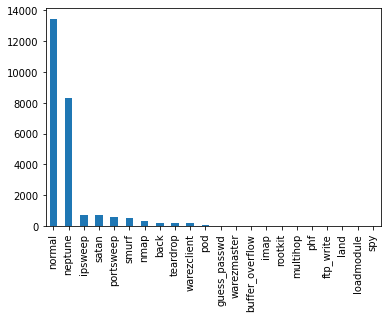

In [8]:
#bar plot to visualize the frequency of targeted value
train['Result'].value_counts().plot.bar()

Relation between target variable and categorical behavior

# Data Preprocessing

In [9]:
#checking for missing values in the train data set
train.isnull().sum()

Duration                        0
Protocol_type                   0
Service                         0
Flag                            0
Src_bytes                       0
Dst_bytes                       0
Land                            0
Wrong_fragment                  0
Urgent                          0
Hot                             0
Num_failed_logins               0
Logged_in                       0
Num_compromised                 0
Root_shell                      0
Su_attempted                    0
Num_root                        0
Num_file_creations              0
Num_shells                      0
Num_access_files                0
Num_outbound_cmds               0
Is_hot_login                    0
Is_guest_login                  0
Count                           0
Srv_count                       0
Serror_rate                     0
Srv_serror_rate                 0
Rerror_rate                     0
Srv_error_rate                  0
Same_srv_rate                   0
Diff_srv_rate 

In [10]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
#count = np.isinf(train).values.sum()
#print(count)
train.isnull().sum()

Duration                        0
Protocol_type                   0
Service                         0
Flag                            0
Src_bytes                       0
Dst_bytes                       0
Land                            0
Wrong_fragment                  0
Urgent                          0
Hot                             0
Num_failed_logins               0
Logged_in                       0
Num_compromised                 0
Root_shell                      0
Su_attempted                    0
Num_root                        0
Num_file_creations              0
Num_shells                      0
Num_access_files                0
Num_outbound_cmds               0
Is_hot_login                    0
Is_guest_login                  0
Count                           0
Srv_count                       0
Serror_rate                     0
Srv_serror_rate                 0
Rerror_rate                     0
Srv_error_rate                  0
Same_srv_rate                   0
Diff_srv_rate 

In [12]:
train=train.dropna(subset=['Service'])

In [13]:
train.isnull().sum()

Duration                        0
Protocol_type                   0
Service                         0
Flag                            0
Src_bytes                       0
Dst_bytes                       0
Land                            0
Wrong_fragment                  0
Urgent                          0
Hot                             0
Num_failed_logins               0
Logged_in                       0
Num_compromised                 0
Root_shell                      0
Su_attempted                    0
Num_root                        0
Num_file_creations              0
Num_shells                      0
Num_access_files                0
Num_outbound_cmds               0
Is_hot_login                    0
Is_guest_login                  0
Count                           0
Srv_count                       0
Serror_rate                     0
Srv_serror_rate                 0
Rerror_rate                     0
Srv_error_rate                  0
Same_srv_rate                   0
Diff_srv_rate 

In [14]:
#finding categoritcal features
numeric_columns=train._get_numeric_data().columns
categorical_columns=list(set(train.columns)-set(numeric_columns))
categorical_columns.remove('Result')
categorical_columns

['Flag', 'Service', 'Protocol_type']

In [15]:
#See the data under protocol type
train["Protocol_type"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [16]:
#see the data under service
train["Service"].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

<AxesSubplot:>

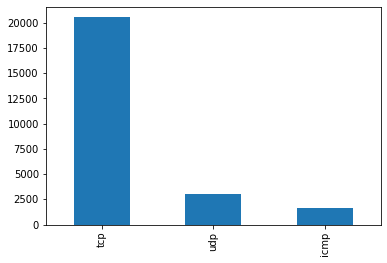

In [17]:
train['Protocol_type'].value_counts().plot.bar()

<AxesSubplot:>

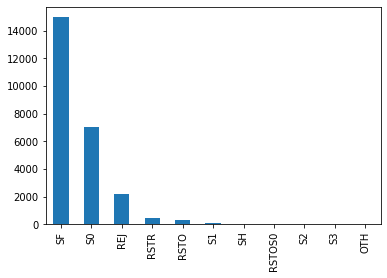

In [18]:
train['Flag'].value_counts().plot.bar()

In [19]:
#visualization by creating a function
def bar_graph(feature):
    train[feature].value_counts().plot(kind="bar")

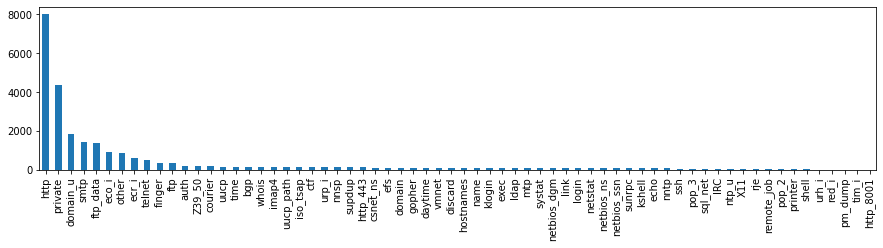

In [20]:
plt.figure(figsize=(15,3))
bar_graph("Service")

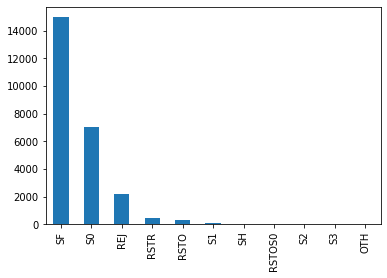

In [21]:
bar_graph("Flag")

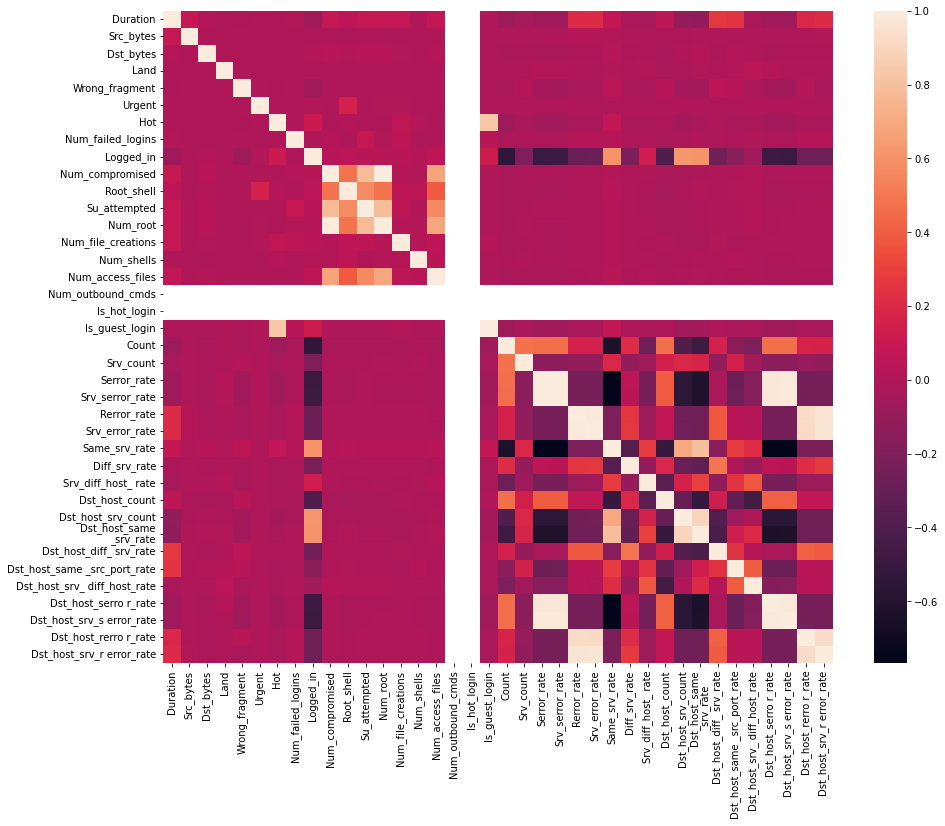

In [22]:
#Total Correlation Visualization
corr=train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [23]:
#correlation in tabular form
train.corr()

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate
Duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,0.050547,0.094243,0.094066,0.088272,-0.001585,0.070206,NaN,NaN,-0.002050,-0.081787,-0.040642,-0.072458,-0.071832,0.209441,0.208354,0.075723,-0.012009,-0.041115,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
Src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,-0.000383,-0.000267,-0.000209,-0.000218,-0.000158,-0.000422,NaN,NaN,-0.000932,-0.007302,-0.003623,-0.006312,-0.006225,0.016015,0.015816,0.007673,-0.003098,-0.003077,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
Dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,0.020214,0.035041,0.035171,0.008456,-0.000146,0.024142,NaN,NaN,-0.001161,-0.027824,-0.012524,-0.022390,-0.022443,-0.013843,-0.013664,0.030018,-0.012300,-0.007560,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
Land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,-0.000351,-0.000247,-0.000194,-0.000248,-0.000168,-0.000391,NaN,NaN,-0.000855,-0.006495,-0.003221,0.014216,0.014259,-0.003316,-0.003324,0.006880,-0.003112,0.014033,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
Wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,-0.003592,-0.002524,-0.001982,-0.002537,-0.001725,-0.004006,NaN,NaN,-0.008756,-0.023241,0.023377,-0.045228,-0.057834,-0.033464,-0.034035,0.056683,-0.027428,-0.028744,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
Urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,0.160007,-0.000174,0.007533,0.011722,-0.000119,-0.000277,NaN,NaN,-0.000605,-0.004593,-0.002321,-0.004033,-0.003994,-0.002345,-0.002351,0.004865,-0.002201,-0.002356,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
Hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,0.021221,0.000478,0.000703,0.067417,0.012888,0.003070,NaN,NaN,0.833556,-0.066655,-0.033420,-0.057841,-0.057147,-0.031452,-0.030326,0.068594,-0.021225,-0.023868,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
Num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,-0.001032,0.088854,0.012654,0.052082,-0.000496,-0.001152,NaN,NaN,0.034240,-0.019060,-0.009576,-0.014831,-0.014670,0.025888,0.025467,0.020245,-0.009158,-0.009803,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
Logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,0.048756,0.034255,0.026899,0.034125,0.023408,0.054378,NaN,NaN,0.118000,-0.539870,-0.198765,-0.491999,-0.490154,-0.284245,-0.279543,0.600093,-0.220632,0.131740,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
Num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,0.479486,0.776284,0.998

In [24]:
#correlation individual
train['Num_root'].corr(train['Num_compromised'])

0.9989564860268236

In [25]:
#analyzing the correlation,since Num_root and Num_compromised are highly correlated, so Num_root should be ignored during analysis
train.drop('Num_root',axis=1,inplace=True)

In [26]:
train['Srv_serror_rate'].corr(train['Serror_rate'])

0.9932900594145517

In [27]:
#highly correlated with serror_rate, so should be ignored(0.9983615072725952)

train.drop('Srv_serror_rate',axis=1,inplace=True)

In [28]:
train['Rerror_rate'].corr(train['Srv_error_rate'])


0.9891336910126398

In [29]:
#rerror_rate highly correlated with srv_error_rate,so srv_error_rate needs to be ignored(0.9890076529820789)
train.drop('Srv_error_rate',axis=1,inplace=True)

In [30]:
#Dst_host_srv_serror_rate is high correlated with srv_serror_rate, so needs to be ignored.(0.9993041091850098)
train.drop('Dst_host_srv_s error_rate',axis=1,inplace=True)

In [31]:
#Dst_host_serror_rate is high correlated with rerror_rate, so needs to be ignored.
train.drop('Dst_host_serro r_rate',axis=1,inplace=True)

In [32]:
train['Dst_host_srv_r error_rate'].corr(train['Rerror_rate'])

0.964886035790343

In [33]:
#Dst_host_srv_rerror_rate is high correlated with Rerror_rate, so needs to be ignored.(0.964449764823)
train.drop('Dst_host_srv_r error_rate',axis=1,inplace=True)

In [34]:
#Dst_host_rerror_rate is high correlated with srv_error_rate, so needs to be ignored.(0.917822)
train.drop('Dst_host_rerro r_rate',axis=1,inplace=True)

In [35]:
#Dst_host_same\n_srv_rate is highly correlated with Dst_host_srv_count and should be ignored.(0.896663)
train.drop('Dst_host_same\n_srv_rate',axis=1,inplace=True)

In [36]:
train.drop('Num_outbound_cmds',axis=1,inplace=True)

In [37]:
#verify if there is still high correlation 
train.corr()

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_file_creations,Num_shells,Num_access_files,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate
Duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,0.050547,0.094243,0.088272,-0.001585,0.070206,NaN,-0.002050,-0.081787,-0.040642,-0.072458,0.209441,0.075723,-0.012009,-0.041115,0.055174,-0.112530,0.263489,0.240970,-0.025485
Src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,-0.000383,-0.000267,-0.000218,-0.000158,-0.000422,NaN,-0.000932,-0.007302,-0.003623,-0.006312,0.016015,0.007673,-0.003098,-0.003077,-0.009764,-0.008520,0.001026,0.002316,-0.001238
Dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,0.020214,0.035041,0.008456,-0.000146,0.024142,NaN,-0.001161,-0.027824,-0.012524,-0.022390,-0.013843,0.030018,-0.012300,-0.007560,-0.030930,-0.000980,-0.012971,0.024078,-0.006006
Land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,-0.000351,-0.000247,-0.000248,-0.000168,-0.000391,NaN,-0.000855,-0.006495,-0.003221,0.014216,-0.003316,0.006880,-0.003112,0.014033,-0.016340,-0.008743,-0.003929,0.024635,0.053037
Wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,-0.003592,-0.002524,-0.002537,-0.001725,-0.004006,NaN,-0.008756,-0.023241,0.023377,-0.045228,-0.033464,0.056683,-0.027428,-0.028744,0.040020,-0.047256,0.053177,0.034670,-0.020174
Urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,0.160007,-0.000174,0.011722,-0.000119,-0.000277,NaN,-0.000605,-0.004593,-0.002321,-0.004033,-0.002345,0.004865,-0.002201,-0.002356,0.004612,-0.006324,-0.002105,-0.003013,-0.001815
Hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,0.021221,0.000478,0.067417,0.012888,0.003070,NaN,0.833556,-0.066655,-0.033420,-0.057841,-0.031452,0.068594,-0.021225,-0.023868,-0.009083,-0.048495,-0.007962,-0.030640,-0.021170
Num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,-0.001032,0.088854,0.052082,-0.000496,-0.001152,NaN,0.034240,-0.019060,-0.009576,-0.014831,0.025888,0.020245,-0.009158,-0.009803,-0.026460,-0.022315,0.000298,-0.008910,-0.007551
Logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,0.048756,0.034255,0.034125,0.023408,0.054378,NaN,0.118000,-0.539870,-0.198765,-0.491999,-0.284245,0.600093,-0.220632,0.131740,-0.395905,0.624839,-0.255820,-0.159278,-0.057390
Num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,0.479486,0.776284,0.020380,0.007249,0.680610,NaN,-0.002100,-0.015882,-0.008028,-0.012905,-0.002476,0.016799,-0.007570,-0.007839,-0.015637,-0.018220,0.001757,-0.004146,0.013608


In [38]:
numeric_columns=train._get_numeric_data().columns
categorical_columns=list(set(train.columns)-set(numeric_columns))
categorical_columns.remove('Result')
categorical_columns

['Flag', 'Service', 'Protocol_type']

In [39]:
train["Protocol_type"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [40]:
train["Service"].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [41]:
train["Flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [42]:
#converting categorical values into numeric 
#can be done in this way as well
#from sklearn import preprocessing
#label_encoder=preprocessing.LabelEncoder()
#train['Flag']=label_encoder.fit_transform(train['Flag'])
train.Protocol_type=train.Protocol_type.map({"tcp":0,"udp":1,"icmp":2})
train.Service=train.Service.map({"ftp_data":0,"other":1,"private":2,"http":3,"remote_job":4,"name":5,"netbios_dgm":6,"eco_i":7,"mtp":8,"telnet":9,"finger":10,"domain_u":11,"supdup":12,"uucp_path":13,"Z39_50":14,"smtp":15,"csnet_ns":16,"uucp":17,"netbios_dgm":18,"urp_i":19,"auth":20,"domain":21,"ftp":22,"bgp":23,"ldap":24,"ecr_i":25,"gopher":26,"vmnet":27,"systat":28,"http_433":29,"efs":30,"whois":31,"imap4":32,"iso_tsap":33,"echo":34,"klogin":35,"link":36,"sunrpc":37,"login":38,"kshell":39,"sql_net":40,"time":41,"hostnames":42,"exec":43,"ntp_u":44,"discard":45,"nntp":46,"courier":47,"ctf":48,"ssh":49,"daytime":50,"shell":51,"netstat":52,"pop3":53,"nnsp":54,"IRC":55,"pop_2":56,"printer":57,"tim_i":58,"pm_dump":59,"red_i":60,"netbios_ssn":61,"rje":62,"X11":63,"urh_i":64,"http_8001":65,"aol":66,"http_2784":67,"tftp_u":68,"harvest":69})
train.Flag=train.Flag.map({"SF":0,"S0":1,"REJ":2,"RSTR":3,"SH":4,"RSTO":5,"S1":6,"RSTOS0":7,"S3":8,"S2":9,"OTH":10})

In [43]:
#checking the numeric replacement
train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_file_creations,Num_shells,Num_access_files,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Result
0,0,0,0.0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,1,1.0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,neptune
3,0,0,3.0,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,0,3.0,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


# Model Building

In [44]:
train.columns

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_file_creations', 'Num_shells', 'Num_access_files',
       'Is_hot_login', 'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
       'Rerror_rate', 'Same_srv_rate', 'Diff_srv_rate', 'Srv_diff_host_ rate',
       'Dst_host_count', 'Dst_host_srv_count', 'Dst_host_diff_ srv_rate',
       'Dst_host_same _src_port_rate', 'Dst_host_srv_ diff_host_rate',
       'Result'],
      dtype='object')

In [45]:
predictors = train[train.columns.difference(['Result'])]

In [46]:
predictors.columns

Index(['Count', 'Diff_srv_rate', 'Dst_bytes', 'Dst_host_count',
       'Dst_host_diff_ srv_rate', 'Dst_host_same _src_port_rate',
       'Dst_host_srv_ diff_host_rate', 'Dst_host_srv_count', 'Duration',
       'Flag', 'Hot', 'Is_guest_login', 'Is_hot_login', 'Land', 'Logged_in',
       'Num_access_files', 'Num_compromised', 'Num_failed_logins',
       'Num_file_creations', 'Num_shells', 'Protocol_type', 'Rerror_rate',
       'Root_shell', 'Same_srv_rate', 'Serror_rate', 'Service', 'Src_bytes',
       'Srv_count', 'Srv_diff_host_ rate', 'Su_attempted', 'Urgent',
       'Wrong_fragment'],
      dtype='object')

In [47]:
predictors.head()

,Count,Diff_srv_rate,Dst_bytes,Dst_host_count,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_srv_count,Duration,Flag,Hot,Is_guest_login,Is_hot_login,Land,Logged_in,Num_access_files,Num_compromised,Num_failed_logins,Num_file_creations,Num_shells,Protocol_type,Rerror_rate,Root_shell,Same_srv_rate,Serror_rate,Service,Src_bytes,Srv_count,Srv_diff_host_ rate,Su_attempted,Urgent,Wrong_fragment
0,2,0.00,0,150,0.03,0.17,0.00,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1.00,0.0,0.0,491,2,0.00,0,0,0
1,13,0.15,0,255,0.60,0.88,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.08,0.0,1.0,146,1,0.00,0,0,0
2,123,0.07,0,255,0.05,0.00,0.00,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.05,1.0,2.0,0,6,0.00,0,0,0
3,5,0.00,8153,30,0.00,0.03,0.04,255,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,1.00,0.2,3.0,232,5,0.00,0,0,0
4,30,0.00,420,255,0.00,0.00,0.00,255,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,1.00,0.0,3.0,199,32,0.09,0,0,0


In [48]:
train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_file_creations,Num_shells,Num_access_files,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Result
0,0,0,0.0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,1,1.0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,neptune
3,0,0,3.0,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,0,3.0,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [49]:
#allocating the targeted columns
X=predictors.values
#assigning target variable
Y=train.Result

In [50]:
X,Y

(array([[2.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.30e+01, 1.50e-01, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.23e+02, 7.00e-02, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        ...,
        [1.05e+02, 7.00e-02, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.29e+02, 6.00e-02, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [3.80e+01, 1.10e-01, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]]),
 0             normal
 1             normal
 2            neptune
 3             normal
 4             normal
             ...     
 25187        neptune
 25188    warezclient
 25189        neptune
 25190        neptune
 25191        neptune
 Name: Result, Length: 25192, dtype: object)

In [51]:
#using train_test_split function from sklearn to divide the train dataset
#importing library
from sklearn.model_selection import train_test_split

In [52]:
#split the data into train and cross validation 
#same train and test sets across different executions hence random_state=0.
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [53]:
#shaping the dimension of the data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17634, 32), (7558, 32), (17634,), (7558,))

In [54]:
#importing decision tree and accuracy_score from sklearn
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [55]:

np.isnan(X_train).sum()


np.isinf(X_train).sum()


0

In [56]:
X_train = np.nan_to_num(X_train.astype(np.float32))
X_test = np.nan_to_num(X_test.astype(np.float32))

In [57]:
X_train=X_train.astype(np.uint8)
X_test=X_test.astype(np.uint8)

In [58]:
#fit the model
model=EllipticEnvelope().fit(X_train)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [59]:
#X_test = test[predictors].values
prediction= model.predict(X_test)

In [60]:
prediction[prediction == 1]
prediction[prediction == -1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [61]:
indices_1 = np.where(prediction==-1)
indices1 = np.where(prediction==1)


In [62]:
indices_list_1 = list(indices_1)
indices_list1 = list(indices1)


indices_list_final_1 = indices_list_1[0]
indices_list_final1 = indices_list1[0]


In [63]:
labels_1 = []
for i in range(len(indices_list_final_1)):
    labels_1.append(y_test.to_numpy()[i])
print(labels_1)    

['normal', 'warezclient', 'normal', 'neptune', 'neptune', 'normal', 'normal', 'ipsweep', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'smurf', 'normal', 'normal', 'portsweep', 'normal', 'neptune', 'warezclient', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'teardrop', 'normal', 'neptune', 'normal', 'normal', 'back', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'satan', 'normal', 'satan', 'normal', 'neptune', 'normal', 'back', 'neptune', 'normal', 'nmap', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'back', 'normal', 'normal', 'normal', 'neptune', 'smurf', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'neptune', 'satan', 'neptune', 'normal', 'normal', 'pod', 'ipsweep', 'neptune', 'neptune', 'neptune', 

In [64]:
labels1 = []
for i in range(len(indices_list_final1)):
    labels1.append(y_test.to_numpy()[i])
print(labels1)    

['normal', 'warezclient', 'normal', 'neptune', 'neptune', 'normal', 'normal', 'ipsweep', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'smurf', 'normal', 'normal', 'portsweep', 'normal', 'neptune', 'warezclient', 'neptune', 'normal', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'teardrop', 'normal', 'neptune', 'normal', 'normal', 'back', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'satan', 'normal', 'satan', 'normal', 'neptune', 'normal', 'back', 'neptune', 'normal', 'nmap', 'normal', 'neptune', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'neptune', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'normal', 'back', 'normal', 'normal', 'normal', 'neptune', 'smurf', 'normal', 'neptune', 'neptune', 'neptune', 'normal', 'neptune', 'normal', 'neptune', 'portsweep', 'normal', 'neptune', 'satan', 'neptune', 'normal', 'normal', 'pod', 'ipsweep', 'neptune', 'neptune', 'neptune', 

In [65]:
unique_labels_1 = set(labels_1)
unique_labels_1


{'back',
 'ipsweep',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [66]:
print(labels_1.count("back"),labels_1.count("imap"),labels_1.count("ipsweep"),labels_1.count("neptune"),labels_1.count("nmap"),labels_1.count("normal"),labels_1.count("pod"),labels_1.count("portsweep"),labels_1.count("rootkit"),labels_1.count("satan"),labels_1.count("smurf"),labels_1.count("teardrop"),labels_1.count("warezclient"),labels_1.count("warezmaster"))

11 0 17 224 9 377 2 16 0 22 13 5 6 1


In [67]:
unique_labels1 = set(labels1)
unique_labels1


{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'loadmodule',
 'neptune',
 'nmap',
 'normal',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [68]:
print(labels1.count("back"),labels1.count("ipsweep"),labels1.count("neptune"),labels1.count("nmap"),labels1.count("normal"),labels1.count("pod"),labels1.count("portsweep"),labels1.count("satan"),labels1.count("smurf"),labels1.count("teardrop"),labels1.count("warezclient"),labels1.count("warezmaster"))

56 196 2220 79 3668 10 184 189 137 50 54 1


In [69]:
from numpy import where
# filter outlier index
outlier_index = where(prediction == -1) 
# filter outlier values
outlier_values = train.iloc[outlier_index]
outlier_values

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_file_creations,Num_shells,Num_access_files,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Result
6,0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,0.0,0.05,0.06,0.00,255,9,0.05,0.00,0.00,neptune
18,0,0,3.0,0,233,616,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0.0,0.0,1.00,0.00,0.00,66,255,0.00,0.02,0.03,normal
53,0,0,3.0,0,220,1398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,26,42,0.0,0.0,1.00,0.00,0.05,26,255,0.00,0.04,0.03,normal
56,0,2,7.0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,0.0,0.0,1.00,0.00,1.00,2,46,0.00,1.00,0.26,nmap
69,0,0,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,21,1.0,0.0,0.12,0.06,0.00,255,21,0.06,0.00,0.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7527,0,0,3.0,0,224,832,0,0,0,0,0,1,0,0,0,0,0,0,0,0,34,34,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00,0.00,normal
7530,7,0,15.0,0,1401,494,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0.0,0.0,1.00,0.00,1.00,255,12,0.02,0.00,0.00,normal
7532,2,0,15.0,0,1647,326,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0.0,0.0,1.00,0.00,1.00,166,159,0.04,0.01,0.01,normal
7534,0,0,3.0,0,258,14029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.00,0.00,0.00,255,255,0.00,0.00,0.00,normal


In [70]:

from sklearn.metrics import silhouette_score
SS=silhouette_score(X_test,prediction)
SS


0.12220658187057684